# Assignment 1: 
# Topics in Natural Language Processing (202-2-5381) Fall 2018
# Prof. Michael Elhadad

### Author: Dina Svetlitsky

[Assignment description](https://www.cs.bgu.ac.il/~elhadad/nlp18/hw2.html)

## Q1. Questions Classification 

### Q1.1. Dataset description
In this part we will use questions classificaton dataset described in [Li, Dan Roth, Learning Question Classifiers. COLING'02](http://www.aclweb.org/anthology/C02-1150).

This paper presents a machine learning approach to question classification. 

Question Classification(QC) is defined to be a task in which, given a question, maps it to one of k classes, which provide a semantic constraint on
the sought-after answer. A question classification module should: (1) provide constraints on the answer types that allow
further processing to precisely locate and verify the
answer. (2) Should provide information that downstream
processes may use in determining answer selection
strategies that may be answer type specific,
rather than uniform. For example, given the question
“Who was the first woman killed in the Vietnam
War?” we would like to know that the target of this question is a person, thereby reducing
the space of possible answers significantly

The authors developed a hierarchical
classifier that is guided by a layered semantic hierarchy of answers types, and used it to classify questions into fine-grained classes. The question classifier makes use of a sequence
of two simple classifiers, each utilizing the Winnow algorithm within SNoW. The first classifies questions into coarse classes (Coarse Classifier) and the second into fine classes (Fine Classifier).

The hierarchical classifier got f1 score of 84.2. However, comparison between the hierarchical and a flat classifier shows that there is no advantage to the hierarchical classifier.
The authors also computed f1 score when allowing multiple labels, while checking if one of 5 labels they predicted fits the true labeling. In this evaluation method, the f1 score is much higher and reaches 95. 

Data is collected from 4 sources: 
1. 4,500 English questions published by USC (Hovy et al., 2001)
2. About 500 manually constructed questions for a few rare classes
3. 894 TREC 8 and TREC 9 questions
4. 500 questions from TREC 10 which serves as a test set

In the TREC competition (Voorhees, 2000), participants are requested to build a system which, given a set of English questions, can automatically extract answers (a short phrase) of no more than 50 bytes from a 5-gigabyte document library.

The questions were manually labeled according to question hierarchy:
A two-layered taxonomy, which represents a natural semantic classification for typical answers in the TREC task. The hierarchy contains 6 coarse classes (ABBREVIATION, ENTITY, DESCRIPTION, HUMAN, LOCATION and NUMERIC VALUE) and 50 fine classes. Each coarse class contains a non-overlapping set of fine classes. For example the coarse class HUMAN contains a set of 4 fine classes: group, induvidual, title, description. The motivation behind adding a level of coarse classes is that of
compatibility with previous work’s definitions, and comprehensibility.

There is exactly one label to each question. 
Annotators were requested to choose the most suitable class according to their own understanding. This methodology might cause slight problems in training, when the labels are ambiguous, since some questions are not treated as positive examples for possible classes as they should be. 

#### Training Set: 
5,500 questions from the first three sources were randomly divided into 5 training sets of 1,000, 2,000, 3,000, 4,000 and 5,500 questions.

#### Test Set:
All 500 TREC 10 questions (source number 4) are used as the test set.

### Q1.2. Dataset Exploration

In [211]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
%matplotlib inline

Let's read the tagged train dataset that contains all 5,500 questions

In [212]:
def parse_tagged_quests_dataset(file_name):
    dataset_file = open(file_name, "r")
    quests_tagged = []
    for line in dataset_file:
        line_arr = line.rstrip().split()
        coarse_class = line_arr[0].split(":")[0]
        fine_class = line_arr[0].split(":")[1]
        raw_question = " ".join(line_arr[1:])
        
        quests_tagged.append((raw_question, coarse_class, fine_class))
  
    return quests_tagged

In [213]:
train_set_file = "questions_dataset/train_5500.label"
train_quests_raw_tagged = parse_tagged_quests_dataset(train_set_file)
train_quests_raw_tagged[:2]

[('How did serfdom develop in and then leave Russia ?', 'DESC', 'manner'),
 ('What films featured the character Popeye Doyle ?', 'ENTY', 'cremat')]

Number of questions:

In [214]:
len(train_quests_raw_tagged)

5452

Well, it is not exactly 5,500 questions, but rather 5,452 questions

Now, to perform some analysis we will create a dataframe: 

In [215]:
questions_dataset = []
for raw_quest, coarse_tag, fine_tag in train_quests_raw_tagged:
    tokens = raw_quest.lower().split(" ")
    questions_dataset.append({'coarse class': coarse_tag, 'fine class': fine_tag, 
                              #'question': " ".join(question_tokens), 
                              'n. of tokens': len(tokens),
                              'vocab. size': len(set(tokens))
                             })
train_df = pd.DataFrame(questions_dataset)

Now we will peek at the top lines in the created data frame:

In [216]:
train_df.head()

,coarse class,fine class,n. of tokens,vocab. size
0,DESC,manner,10,10
1,ENTY,cremat,8,8
2,DESC,manner,12,12
3,ENTY,animal,13,11
4,ABBR,exp,8,8


What are the 10 most common words for each label?

In [217]:
from collections import Counter
def get_top_coarse_tokens(quests_tagged, top, stop_words = []):
    tokens_per_coarse_tag = {}
    for raw_quest, coarse_tag, fine_tag in quests_tagged:
        quest_tokens = raw_quest.lower().split(" ")
        if coarse_tag not in tokens_per_coarse_tag:
            tokens_per_coarse_tag[coarse_tag] = Counter()
        for token in quest_tokens:
            if token not in stop_words:
                tokens_per_coarse_tag[coarse_tag][token] += 1
            
    return pd.DataFrame({coarse_tag:counter.most_common(top) for coarse_tag, counter in tokens_per_coarse_tag.items()})

In [218]:
get_top_coarse_tokens(train_quests_raw_tagged, 10)

,ABBR,DESC,ENTY,HUM,LOC,NUM
0,"(what, 86)","(?, 1151)","(?, 1216)","(?, 1179)","(?, 826)","(?, 892)"
1,"(?, 86)","(what, 762)","(what, 1152)","(the, 1017)","(the, 669)","(the, 559)"
2,"(for, 54)","(the, 603)","(the, 875)","(who, 597)","(what, 554)","(how, 492)"
3,"(the, 48)","(is, 487)","(of, 452)","(what, 547)","(is, 304)","(many, 323)"
4,"(does, 48)","(how, 287)","(is, 400)","(of, 386)","(where, 258)","(what, 276)"
5,"(stand, 41)","(a, 264)","(a, 310)","(in, 293)","(in, 221)","(of, 246)"
6,"(is, 33)","(of, 247)","(in, 302)","(was, 291)","(of, 201)","(in, 245)"
7,"(abbreviation, 16)","(do, 213)","('s, 206)","('s, 237)","(country, 123)","(is, 223)"
8,"(of, 15)","(to, 130)","(,, 173)","(is, 234)","('s, 102)","(a, 213)"
9,"(in, 10)","(in, 129)","(to, 162)","(a, 159)","(city, 101)","(when, 136)"


We can see that '?' and 'the' are common for all tags, so they are not informative. Let's get rid of them:

In [219]:
stop_words = ['?', 'the']
get_top_coarse_tokens(train_quests_raw_tagged, 10, stop_words)

,ABBR,DESC,ENTY,HUM,LOC,NUM
0,"(what, 86)","(what, 762)","(what, 1152)","(who, 597)","(what, 554)","(how, 492)"
1,"(for, 54)","(is, 487)","(of, 452)","(what, 547)","(is, 304)","(many, 323)"
2,"(does, 48)","(how, 287)","(is, 400)","(of, 386)","(where, 258)","(what, 276)"
3,"(stand, 41)","(a, 264)","(a, 310)","(in, 293)","(in, 221)","(of, 246)"
4,"(is, 33)","(of, 247)","(in, 302)","(was, 291)","(of, 201)","(in, 245)"
5,"(abbreviation, 16)","(do, 213)","('s, 206)","('s, 237)","(country, 123)","(is, 223)"
6,"(of, 15)","(to, 130)","(,, 173)","(is, 234)","('s, 102)","(a, 213)"
7,"(in, 10)","(in, 129)","(to, 162)","(a, 159)","(city, 101)","(when, 136)"
8,"(,, 9)","(does, 129)","(was, 138)","(to, 153)","(,, 87)","(are, 136)"
9,"(mean, 9)","(``, 112)","(name, 118)","(,, 151)","(a, 78)","(did, 121)"


Now let's create a vocabulary

In [220]:
vocabulary = Counter(token for raw_quest, coarse_tag, fine_tag in train_quests_raw_tagged 
                     for token in raw_quest.lower().split(" "))
vocabulary.most_common(10)

[('?', 5350),
 ('the', 3771),
 ('what', 3377),
 ('is', 1681),
 ('of', 1547),
 ('in', 1200),
 ('a', 1029),
 ('how', 789),
 ("'s", 720),
 ('was', 653)]

In [221]:
len(vocabulary)

8678

Number of words appearing 1-5 times:

Counter({1: 5200, 2: 1304, 3: 598, 4: 369, 5: 261})


<Container object of 5 artists>

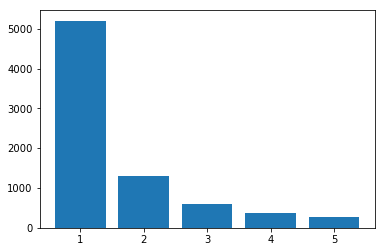

In [222]:
count_rare_words = Counter(count for count in vocabulary.values() if count < 6)
print(count_rare_words)
plt.bar(range(1,6), [count_rare_words[count] for count in range(1,6)])

In [223]:
sum(count_rare_words.values())/len(vocabulary)

0.890988707075363

90% of the words in the vocabulary occur only 1-5 times.

The describe method can help us gather some statistics on the data

In [224]:
train_df.describe(include='all')

,coarse class,fine class,n. of tokens,vocab. size
count,5452,5452,5452.000000,5452.000000
unique,6,47,NaN,NaN
top,ENTY,ind,NaN,NaN
freq,1250,962,NaN,NaN
mean,NaN,NaN,10.204512,9.855282
std,NaN,NaN,3.888865,3.484136
min,NaN,NaN,3.000000,3.000000
25%,NaN,NaN,7.000000,7.000000
50%,NaN,NaN,10.000000,9.000000
75%,NaN,NaN,12.000000,12.000000


In [225]:
import numpy as np
grouped = train_df.groupby('coarse class')
grouped.agg([np.sum, np.mean, np.std])

n. of tokens                      vocab. size             \
                      sum       mean       std         sum       mean   
coarse class                                                            
ABBR          689          8.011628   3.273761  665         7.732558    
DESC          10235        8.808090   3.840960  9892        8.512909    
ENTY          13463        10.770400  3.706302  13017       10.413600   
HUM           13643        11.155356  4.423239  13065       10.682747   
LOC           8327         9.972455   3.290923  8051        9.641916    
NUM           9278         10.354911  3.350834  9041        10.090402   

                        
                   std  
coarse class            
ABBR          2.916180  
DESC          3.423120  
ENTY          3.318335  
HUM           3.928046  
LOC           2.968244  
NUM           3.006822

In [226]:
grouped = train_df.groupby('fine class')
grouped.agg([np.sum, np.mean, np.std])

n. of tokens                      vocab. size                     
                    sum       mean       std         sum       mean       std
fine class                                                                   
abb         171          10.687500  2.651258  159         9.937500   2.264766
animal      1178         10.517857  3.210294  1130        10.089286  2.820624
body        159          9.937500   3.434506  148         9.250000   2.380476
city        1381         10.705426  2.818474  1337        10.364341  2.499806
code        102          11.333333  3.082207  98          10.888889  2.666667
color       395          9.875000   3.039800  388         9.700000   2.812062
count       3928         10.820937  3.243932  3848        10.600551  2.871598
country     1580         10.193548  2.880965  1533        9.890323   2.572501
cremat      2497         12.062802  4.002538  2426        11.719807  3.694491
currency    29           7.250000   1.258306  29          7.250000   1.258306
date        1992         9.137615   3.008338  1955        8.967890   2.751435
def         2700         6.413302   2.345251  2664        6.327791   2.169466
desc        3194         9.950156   3.803453  3035        9.454829   3.311719
dismed      938          9.106796   4.099050  914         8.873786   3.431914
dist        291          8.558824   2.862412  281         8.264706   2.573864
event       656          11.714286  3.441534  625         11.160714  3.097077
exp         518          7.400000   3.103995  506         7.228571   2.824178
food        1059         10.281553  3.335541  1032        10.019417  3.022726
gr          2089         11.052910  3.554643  2025        10.714286  3.273500
ind         11069        11.506237  4.495166  10560       10.977131  3.959932
instru      97           9.700000   3.128720  97          9.700000   3.128720
lang        148          9.250000   2.380476  142         8.875000   2.217356
letter      88           9.777778   1.986063  86          9.555556   1.810463
manner      2653         9.612319   3.671769  2582        9.355072   3.351636
money       836          11.774648  3.590452  803         11.309859  2.998054
mount       210          10.000000  2.449490  200         9.523810   2.204973
ord         72           12.000000  2.366432  70          11.666667  2.732520
other       7353         10.031378  3.666098  7101        9.687585   3.313628
perc        339          12.555556  3.489912  326         12.074074  3.024591
period      812          10.826667  3.508189  788         10.506667  3.223115
plant       126          9.692308   2.954788  120         9.230769   2.241794
product     465          11.071429  3.203602  451         10.738095  2.930575
reason      1936         10.136126  4.491196  1859        9.732984   3.879353
religion    33           8.250000   0.957427  33          8.250000   0.957427
speed       72           8.000000   2.061553  69          7.666667   1.936492
sport       720          11.612903  4.013726  695         11.209677  3.265001
state       641          9.712121   2.265223  622         9.424242   2.105382
substance   375          9.146341   3.142936  364         8.878049   2.767626
symbol      110          10.000000  2.097618  105         9.545455   1.752920
techmeth    443          11.657895  3.033830  431         11.342105  2.622937
temp        81           10.125000  2.474874  81          10.125000  2.474874
termeq      1026         11.032258  3.745872  983         10.569892  3.430673
title       237          9.480000   2.785678  232         9.280000   2.508652
veh         300          11.111111  3.202563  286         10.592593  2.763210
volsize     110          8.461538   3.502746  107         8.230769   3.443686
weight      119          10.818182  3.458849  112         10.181818  2.786330
word        307          11.807692  4.223925  293         11.269231  3.758273

In [227]:
grouped_by_coarse = train_df.groupby('coarse class')
grouped_by_coarse = grouped_by_coarse.count().drop(['n. of tokens', 'vocab. size'], 1)

grouped_by_coarse['percent'] = [100 * x / grouped_by_coarse['fine class'].sum() 
                                for x in grouped_by_coarse['fine class']]
grouped_by_coarse

,fine class,percent
coarse class,,
ABBR,86,1.577403
DESC,1162,21.313280
ENTY,1250,22.927366
HUM,1223,22.432135
LOC,835,15.315481
NUM,896,16.434336


In this table we can see that a large percent of questions are tagged as ENTY and HUM. 

In [228]:
grouped = train_df.groupby('fine class')
grouped = grouped.count().drop(['n. of tokens', 'vocab. size'], 1)
grouped['percent'] = [100 * x / grouped['coarse class'].sum() for x in grouped['coarse class']]
grouped

,coarse class,percent
fine class,,
abb,16,0.293470
animal,112,2.054292
body,16,0.293470
city,129,2.366104
code,9,0.165077
color,40,0.733676
count,363,6.658107
country,155,2.842993
cremat,207,3.796772


Looks like ind and other are common tags

In [229]:
train_df.groupby('coarse class').describe(include='all').dropna(axis=1, how='all')

fine class                    n. of tokens                       \
                  count unique    top freq        count       mean       std   
coarse class                                                                   
ABBR          86         2      exp    70   86.0         8.011628   3.273761   
DESC          1162       4      def    421  1162.0       8.808090   3.840960   
ENTY          1250       22     other  217  1250.0       10.770400  3.706302   
HUM           1223       4      ind    962  1223.0       11.155356  4.423239   
LOC           835        5      other  464  835.0        9.972455   3.290923   
NUM           896        13     count  363  896.0        10.354911  3.350834   

                                          vocab. size                       \
              min  25%   50%    75%   max       count       mean       std   
coarse class                                                                 
ABBR          4.0  6.0  7.0   10.75  18.0  86.0        7.732558   2.916180   
DESC          3.0  6.0  8.0   11.00  37.0  1162.0      8.512909   3.423120   
ENTY          5.0  8.0  10.0  13.00  31.0  1250.0      10.413600  3.318335   
HUM           3.0  8.0  11.0  13.00  34.0  1223.0      10.682747  3.928046   
LOC           4.0  8.0  10.0  12.00  29.0  835.0       9.641916   2.968244   
NUM           5.0  8.0  10.0  12.00  29.0  896.0       10.090402  3.006822   

                                          
              min  25%   50%   75%   max  
coarse class                              
ABBR          4.0  6.0  7.0   10.0  17.0  
DESC          3.0  6.0  8.0   10.0  28.0  
ENTY          5.0  8.0  10.0  12.0  30.0  
HUM           3.0  8.0  10.0  13.0  30.0  
LOC           4.0  8.0  9.0   11.0  25.0  
NUM           5.0  8.0  10.0  12.0  25.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EAD9EBD68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020EAF799898>]], dtype=object)

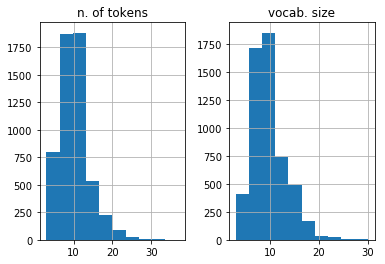

In [230]:
train_df.hist()

In [231]:
train_label_dist_dict = {coarse_class: Counter(train_df[train_df['coarse class'] == coarse_class]['fine class']) for 
              coarse_class in train_df['coarse class'].unique()}

Distribution of flat labels per coarse label

In [232]:
class_tuples = [(coarse, fine) for coarse in train_label_dist_dict for fine in train_label_dist_dict[coarse].keys()]
counts = [train_label_dist_dict[coarse][fine] for coarse, fine in class_tuples]
index = pd.MultiIndex.from_tuples(class_tuples, names=['Coarse', 'Fine'])
train_label_dist_df = pd.DataFrame(counts, index=index)
train_label_dist_df

0
Coarse Fine          
DESC   manner     276
       def        421
       reason     191
       desc       274
ENTY   cremat     207
       animal     112
       event      56 
       other      217
       letter     9  
       religion   4  
       food       103
       color      40 
       termeq     93 
       body       16 
       dismed     103
       product    42 
       substance  41 
       sport      62 
       plant      13 
       techmeth   38 
       instru     10 
       word       26 
       lang       16 
       symbol     11 
       veh        27 
       currency   4  
ABBR   exp        70 
       abb        16 
HUM    ind        962
       gr         189
       title      25 
       desc       47 
NUM    date       218
       count      363
       money      71 
       period     75 
       volsize    13 
       other      52 
       speed      9  
       perc       27 
       code       9  
       dist       34 
       temp       8  
       ord        6  
       weight     11 
LOC    state      66 
       other      464
       country    155
       city       129
       mount      21

### Q1.3 Baseline classifier

We can create a baseline classifier for coarse labels by using simple rules. For example, if a query starts with Who or Whom: label it 'Human'

First, we need the test data.

In [233]:
test_set_file = "questions_dataset/TREC_10.label"
test_quests_raw_tagged = parse_tagged_quests_dataset(test_set_file)
len(test_quests_raw_tagged)

500

In [234]:
test_quests_raw_tagged[:2]

[('How far is it from Denver to Aspen ?', 'NUM', 'dist'),
 ('What county is Modesto , California in ?', 'LOC', 'city')]

We need only coarse tags in this part. Therefore we will create test set with only coarse tags.

In [235]:
test_quests_raw_coarse_tagged = [(quest,coarse_tag) for quest, coarse_tag, fine_tag in test_quests_raw_tagged]
test_quests_raw_coarse_tagged[:2]

[('How far is it from Denver to Aspen ?', 'NUM'),
 ('What county is Modesto , California in ?', 'LOC')]

In addition, we need an untagged test set

In [236]:
from nltk.tag import untag
test_quests_raw_untagged = untag(test_quests_raw_coarse_tagged)
test_quests_raw_untagged[:2]

['How far is it from Denver to Aspen ?',
 'What county is Modesto , California in ?']

We will use the information of most common words for each tag, in order define rules for the baseline classifier.

In [237]:
import string
stop_words = ['?', 'the', 'a', 'is'] + [punct for punct in string.punctuation]
get_top_coarse_tokens(train_quests_raw_tagged, 15, stop_words)

,ABBR,DESC,ENTY,HUM,LOC,NUM
0,"(what, 86)","(what, 762)","(what, 1152)","(who, 597)","(what, 554)","(how, 492)"
1,"(for, 54)","(how, 287)","(of, 452)","(what, 547)","(where, 258)","(many, 323)"
2,"(does, 48)","(of, 247)","(in, 302)","(of, 386)","(in, 221)","(what, 276)"
3,"(stand, 41)","(do, 213)","('s, 206)","(in, 293)","(of, 201)","(of, 246)"
4,"(abbreviation, 16)","(to, 130)","(to, 162)","(was, 291)","(country, 123)","(in, 245)"
5,"(of, 15)","(in, 129)","(was, 138)","('s, 237)","('s, 102)","(when, 136)"
6,"(in, 10)","(does, 129)","(name, 118)","(to, 153)","(city, 101)","(are, 136)"
7,"(mean, 9)","(``, 112)","(are, 115)","(name, 144)","(can, 77)","(did, 121)"
8,"(``, 7)","('', 112)","(for, 109)","('', 142)","(i, 75)","(was, 115)"
9,"('', 6)","(are, 106)","(and, 101)","(``, 140)","(to, 74)","(does, 95)"


Bigrams can provide additional information.

In [238]:
def get_bigram_tokens(raw_quest):
    quest_tokens = raw_quest.lower().split(" ") 
    return [" ".join([quest_tokens[i], quest_tokens[i+1]]) for i in range(len(quest_tokens)-1)]

In [239]:
def get_top_coarse_tokens_bigrams(quests_tagged, top, stop_words = []):
    tokens_per_coarse_tag = {}
    for raw_quest, coarse_tag, fine_tag in quests_tagged:
        quest_tokens = get_bigram_tokens(raw_quest)
        if coarse_tag not in tokens_per_coarse_tag:
            tokens_per_coarse_tag[coarse_tag] = Counter()
        for token in quest_tokens:
            if token not in stop_words:
                tokens_per_coarse_tag[coarse_tag][token] += 1
            
    return pd.DataFrame({coarse_tag:counter.most_common(top) for coarse_tag, counter in tokens_per_coarse_tag.items()})

In [240]:
get_top_coarse_tokens_bigrams(train_quests_raw_tagged, 15)

,ABBR,DESC,ENTY,HUM,LOC,NUM
0,"(what does, 48)","(what is, 420)","(what is, 253)","(of the, 153)","(is the, 139)","(how many, 323)"
1,"(stand for, 41)","(is the, 191)","(is the, 167)","(who was, 144)","(what is, 95)","(is the, 136)"
2,"(for ?, 32)","(how do, 125)","(of the, 103)","(was the, 124)","(what country, 86)","(what is, 111)"
3,"(what is, 30)","(of the, 84)","(is a, 84)","('' ?, 107)","(where is, 77)","(are there, 71)"
4,"(is the, 16)","(what are, 77)","(what was, 78)","(who is, 107)","(in the, 74)","(was the, 66)"
5,"(the abbreviation, 14)","(is a, 73)","(what 's, 75)","(is the, 106)","(where can, 67)","(in the, 61)"
6,"(does the, 12)","(what does, 68)","(in the, 75)","(in the, 97)","(can i, 65)","(how much, 57)"
7,"(mean ?, 8)","(do you, 63)","(what are, 75)","(what is, 62)","(of the, 61)","(when was, 53)"
8,"(abbreviation for, 7)","('' ?, 59)","('s the, 64)","(the first, 61)","(the world, 57)","(how long, 50)"
9,"(abbreviation of, 5)","(the origin, 53)","(was the, 63)","(name of, 55)","(what city, 49)","(when did, 49)"


It can be seen that for example the bigrams 'how many', 'how much' and 'how long' are common in 'NUM'.

The proportion of each coarse tag can be also useful

In [241]:
grouped_by_coarse

,fine class,percent
coarse class,,
ABBR,86,1.577403
DESC,1162,21.313280
ENTY,1250,22.927366
HUM,1223,22.432135
LOC,835,15.315481
NUM,896,16.434336


In [242]:
class BaselineCalssifier():
    TAGS = ['ABBR', 'NUM', 'HUM', 'LOC', 'DESC', 'ENTY']
    
    TAG_WORDS_UNIGRAM = {
                 'HUM': ['who', 'whom'],
                 'LOC': ['where', 'country', 'city', 'world'],
                 'NUM': ['when', 'date'],
                 'DESC': ['how'],
                 'ABBR': ['abbreviation'],
                 'ENTY': ['name']
                }
    
    TAG_WORDS_BIGRAM = {
                 'HUM': [],
                 'LOC': [],
                 'NUM': ['how many', 'how much', 'how long', 'how far', 'what year'],
                 'DESC': ['what is', 'what are', 'what does', 'how do'],
                 'ABBR': ['stand for'],
                 'ENTY': []
                }
    
    def __init__(self):
        self.default_tag = 'ENTY' #this is a common tag, but does not have specific words associations
        
    def _quest_contains_any_word(self, quest, words):
        return any(word in quest for word in words)
    
    def _get_bigram_tokens(self, quest_tokens):
        return [" ".join([quest_tokens[i], quest_tokens[i+1]]) for i in range(len(quest_tokens)-1)]
        
    def tag_quest(self, quest):
        quest_tokens = quest.lower().split(" ")
        quest_tokens_set = set(quest_tokens)
        for tag in self.TAGS:
            if self._quest_contains_any_word(quest_tokens_set, self.TAG_WORDS_UNIGRAM[tag]) or self._quest_contains_any_word(self._get_bigram_tokens(quest_tokens), self.TAG_WORDS_BIGRAM[tag]):
                return (quest, tag)
        return (quest, self.default_tag)
    
    def batch_tag(self, quests):
        tagged_quests = []
        for quest in quests:
            tagged_quests.append(self.tag_quest(quest))
        return tagged_quests


In [243]:
baseline_classifier = BaselineCalssifier()
test_quest = test_quests_raw_untagged[46]
baseline_classifier.tag_quest(test_quest)

('How long did Rip Van Winkle sleep ?', 'NUM')

In [244]:
baseline_classifier.batch_tag(test_quests_raw_untagged[:2])

[('How far is it from Denver to Aspen ?', 'NUM'),
 ('What county is Modesto , California in ?', 'ENTY')]

### Evaluation

We will start by evaluating the accuracy of the baseline classifier. 
The accuracy is the number of samples predicted correctly, divided by the total number of samples. 

In [245]:
def accuracy(classifier, tagged_dataset):
    """Recieves a tagged dataset, and calculates the accuracy of classifier on the same dataset"""
    pred = classifier.batch_tag(untag(tagged_dataset))
    correct = [l == r for (q,l), (q,r) in zip(tagged_dataset, pred)]

    if correct:
        return sum(correct) / len(correct) * 100
    else:
        return 0

In [246]:
accuracy(baseline_classifier, test_quests_raw_coarse_tagged)

66.8

How does it compare to a default classifier, that taggs all question with the same tag?

In [247]:
class Default_Classifier():
    def __init__(self, default_tag):
        self.default_tag = default_tag
    
    def tag_quest(self, quest):
        return (quest, self.default_tag)
    
    def batch_tag(self, quests):
        tagged_quests = []
        for quest in quests:
            tagged_quests.append(self.tag_quest(quest))
        return tagged_quests

In [248]:
for tag in baseline_classifier.TAGS:
    def_classifier = Default_Classifier(tag)
    print("Tag: " + tag + ", Accuracy " + str(accuracy(def_classifier, test_quests_raw_coarse_tagged)))

Tag: ABBR, Accuracy 1.7999999999999998
Tag: NUM, Accuracy 22.6
Tag: HUM, Accuracy 13.0
Tag: LOC, Accuracy 16.2
Tag: DESC, Accuracy 27.6
Tag: ENTY, Accuracy 18.8


The highest accuracy of 27.6% can be achieved by tagging all questions as 'DESC'. It seems like the baseline heuristic classifier does a much better job than the default classifier, that is encouraging.

Now for more specific evaluation metrics: **precision**, **recall** and **f1-score** per coarse label.
_sklearn_ has a very convenient method for this calculation.

In [249]:
from sklearn import metrics

pred = baseline_classifier.batch_tag(test_quests_raw_untagged)
y_pred = [y for x, y in pred]
y_test = [y for x, y in test_quests_raw_coarse_tagged]

print(metrics.classification_report(y_test, y_pred, digits=3, labels=baseline_classifier.TAGS))

             precision    recall  f1-score   support

       ABBR      1.000     0.778     0.875         9
        NUM      0.985     0.575     0.726       113
        HUM      1.000     0.723     0.839        65
        LOC      0.932     0.506     0.656        81
       DESC      0.532     0.957     0.684       138
       ENTY      0.477     0.447     0.462        94

avg / total      0.758     0.668     0.671       500



#### Precision - what proportion of questions that were predicted as x are actually x
For 'HUM' it is 100% - meaning that when a question was tagged as 'HUM' it is indead 'HUM'.
For 'ENTY' it is quite low (47%). It means that more that 50% of the times that 'ENTY' tag was given to a question, it was not correct. This makes sense as this is the default tag.

#### Recall - what proportion of questions that has a label x, were predicted as x
Even though the precision of 'DESC' is not high (53%) - its recall is pretty high (95%). It means that most of the questions with 'DESC' tag, were tagged correctly.

There is a tradeoff between precision and recall.

#### F1-score - harmonic mean of percision and recall  
f1 score is high for ABBR, NUM and HUM, and low for LOC, DESC and ENTY.

#### Confusion matrix

In [250]:
y_true_s = pd.Categorical(y_test, categories=baseline_classifier.TAGS)
y_pred_s = pd.Categorical(y_pred, categories=baseline_classifier.TAGS)
pd.crosstab(y_pred_s, y_true_s, rownames=['Predicted'], colnames=['Actual'], margins=True)

Actual,ABBR,NUM,HUM,LOC,DESC,ENTY,All
Predicted,,,,,,,
ABBR,7,0,0,0,0,0,7
NUM,0,65,0,0,0,1,66
HUM,0,0,47,0,0,0,47
LOC,0,3,0,41,0,0,44
DESC,2,42,5,16,132,51,248
ENTY,0,3,13,24,6,42,88
All,9,113,65,81,138,94,500


The confusion matrix shows what kind of mistakes this classifier tends to make.
We can see that NUM questions are often tagged by DESC label. ENTY and NUM are often tagged as DESC.

### Q1.4 Features-based classifier

In this part we will implement a feature based classifier, using the types of features described in the paper Section 3.2: words, POS tags, NER tags, chunks and related words.

### 1.4.1 Feature extraction

**Encoding of features:**

**Word features**: Word features can be encoded in different ways: noise words (stop words) filtered or not, with or without lemmatization, with or without case normalization (all lower-case). When analalyzing the data, we have seen that the text is sparse. Therefore we want the dictionary to be as small as possible, and we want the bag of words to be most informative. Hence, we will use tokenization as lower case, lemmatization and finally tf-idf (as there are tokens that occur in all questions, making them not informative). We will also take only 1000 words with heighest tfidf values.

**POS features:** POS features can be encoded in different ways: as a bag of POS-tags, or associated with the word in a bag-of-tagged words such as 'Apple/PROPN'. Again, as the data is sparse, we would like to have less dependence between features. Therefore we decided to decode POS tags as a bag of POS-tags.

**Chunks:** Noun chunks are group of words which correspond to a single nominal phrase. For each chunk, we wil extract the central noun in the chunk. Chunks can be encoded as a bag of chunk-roots.

**NER:** Named Entity Recognition tags can be encoded as a bag of NERs.

**Related words:** Related words can be "learned" from the training dataset by detecting words which have a high chi-square value with each class. We will extract bag of words as described in Word features, than perform a chi2 test to select 100 words with height chi2 score. This will simulate words that are very related to specific classes.

### 1.4.2 scikit-learn based classifier

[Spacy](https://spacy.io/usage/spacy-101#annotations-ner) is a library that can be used for pre-processing of the questions - including POS tagging, Named Entity Recognition and Noun Chunks detection.

In [251]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [252]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')
doc.ents

(Apple, U.K., $1 billion)

In [253]:
for ent in doc.ents:
    print(ent.label_)

ORG
GPE
MONEY


In [254]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)
    print("    ")

Apple apple PROPN NNP nsubj Xxxxx True False
    
is be VERB VBZ aux xx True True
    
looking look VERB VBG ROOT xxxx True False
    
at at ADP IN prep xx True True
    
buying buy VERB VBG pcomp xxxx True False
    
U.K. u.k. PROPN NNP compound X.X. False False
    
startup startup NOUN NN dobj xxxx True False
    
for for ADP IN prep xxx True True
    
$ $ SYM $ quantmod $ False False
    
1 1 NUM CD compound d False False
    
billion billion NUM CD pobj xxxx True False
    


In [255]:
doc = nlp('Apple announced a new model yesterday.')
chunks = list(doc.noun_chunks)
chunks[1].root.text

'model'

Now we will process the train and test data using spacy.

In [256]:
train_quests_processed_tagged = [(nlp(quest), coarse, fine) for quest, coarse, fine in train_quests_raw_tagged]
test_quests_processed_tagged = [(nlp(quest), coarse, fine) for quest, coarse, fine  in test_quests_raw_tagged]

Example of processed train questions:

In [257]:
train_quest = train_quests_processed_tagged[0]
print(train_quest)
for token in train_quest[0]:
    print(token.text, "lemma:", token.lemma_, "POS:", token.pos_)
for ent in train_quest[0].ents:
    print("NER: ", ent.text, ent.label_)
for chunk in train_quest[0].noun_chunks:
    print("Chunk root: ", chunk.root.text)

(How did serfdom develop in and then leave Russia ?, 'DESC', 'manner')
How lemma: how POS: ADV
did lemma: do POS: VERB
serfdom lemma: serfdom POS: NOUN
develop lemma: develop POS: VERB
in lemma: in POS: ADP
and lemma: and POS: CCONJ
then lemma: then POS: ADV
leave lemma: leave POS: VERB
Russia lemma: russia POS: PROPN
? lemma: ? POS: PUNCT
NER:  Russia GPE
Chunk root:  serfdom
Chunk root:  Russia


Example of processed test questions:

In [258]:
test_quest = test_quests_processed_tagged[0]
print(test_quest)
for token in test_quest[0]:
    print(token.text, "lemma:", token.lemma_, "POS:", token.pos_)
for ent in test_quest[0].ents:
    print("NER: ", ent.text, ent.label_)
for chunk in test_quest[0].noun_chunks:
    print("Chunk root: ", chunk.root.text)

(How far is it from Denver to Aspen ?, 'NUM', 'dist')
How lemma: how POS: ADV
far lemma: far POS: ADV
is lemma: be POS: VERB
it lemma: -PRON- POS: PRON
from lemma: from POS: ADP
Denver lemma: denver POS: PROPN
to lemma: to POS: ADP
Aspen lemma: aspen POS: PROPN
? lemma: ? POS: PUNCT
NER:  Denver GPE
Chunk root:  it
Chunk root:  Denver
Chunk root:  Aspen


In [259]:
vocab_counter = Counter(token.lemma_ for quest in train_quests_processed_tagged for token in quest[0])
len(vocab_counter)

7483

The vocabulary with lemmas rather than tokens is now smaller than with just lowercase (8678)

In [260]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn import metrics
from IPython.display import display

    
class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.

    The data is expected to be stored in a 2D data structure, where the first
    index is over features and the second is over samples.
    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]
    
class FeatureExtractor(BaseEstimator, TransformerMixin):
    """Extract the tags from questions.

    Takes a sequence of strings and produces a dict of sequences.  Keys are
    `bow`, `pos`, 'chunk', 'ent'.
    """
    def fit(self, x, y=None):
        return self
    
    def _extract_quest_ents(self, quest):
        return " ".join([ent.label_ for ent in doc.ents])
    
    def _extract_quest_chunk_roots(self, quest):
        chunks = list(quest.noun_chunks)
        return " ".join([chunk.root.text for chunk in chunks])
    
    def _extract_quest_lemmas(self, quest):
        return " ".join([token.lemma_ for token in quest])
    
    def _extract_quest_pos(self, quest):
        return " ".join([token.pos_ for token in quest])

    def transform(self, quests_processed):
        features = np.recarray(shape=(len(quests_processed),),
                               dtype=[('bow', object), ('pos', object), ('chunk', object), ('ent', object)])
        for i, quest in enumerate(quests_processed):
            features['bow'][i] = self._extract_quest_lemmas(quest)
           
            features['pos'][i] = self._extract_quest_pos(quest)
            
            features['chunk'][i] = self._extract_quest_chunk_roots(quest)
            
            features['ent'][i] = self._extract_quest_ents(quest)

        return features

class CLFResult():
    """represents a classifier result"""
    def __init__(self, clf, clf_level, y_pred, y_test):
        self.clf = clf
        self.clf_level = clf_level
        self.y_pred = y_pred
        self.y_test = y_test
        self.acc = metrics.accuracy_score(y_test, y_pred)
    
    def get_clf(self):
        return self.clf
    
    def get_clf_level(self):
        return self.clf_level
    
    def get_y_pred(self):
        return self.y_pred
    
    def get_y_test(self):
        return self.y_test
    
    def get_acc(self):
        return self.acc

def get_tfidf_pipeline(name, max_feat):
    """select a feature by name, then apply tfidf vectorizer"""
    return  (name, Pipeline([
                ('selector', ItemSelector(key=name)),
                ('tfidf', TfidfVectorizer(max_features=max_feat)),
            ]))

def get_bow_chi2_pipeline(name, select_chi2):
    """related words: extract bag of words, apply count vectorizer, then select k best words using chi2 test"""
    return (name, Pipeline([
                ('selector', ItemSelector(key='bow')),
                ('count', CountVectorizer()),
                ('chi2', SelectKBest(chi2, select_chi2)),
            ]))
    
def get_pipeline(clf):
    """a pipeline that extracts features, unifies them and classifies using clf"""
    features_names = ['bow', 'pos', 'chunk', 'ent']
    features_pipelines = [get_tfidf_pipeline(name, 1000) for name in features_names]
    features_pipelines.append(get_bow_chi2_pipeline('bow-chi2',100))
    
    return Pipeline([
    # Extract features
    ('features', FeatureExtractor()),

    # Use FeatureUnion to combine the features
    ('union', FeatureUnion(
        transformer_list=features_pipelines,
    )),

    # Use a classifier on the combined features
    clf,
])

def get_y(label, quests_tagged):
    """get a list of the corresponding labels for quests_tagged"""
    if label == 'coarse':
        return [quest[1] for quest in quests_tagged]
    elif label == 'flat':
        return [quest[2] for quest in quests_tagged]

def untag(quests):
    return [quest[0] for quest in quests]

def classify(clf_level, clf, train, test):
    """fit according to train and predict test, use clf_level labeling"""
    x_train = untag(train)
    y_train = get_y(clf_level, train)

    x_test = untag(test)
    y_test = get_y(clf_level, test)
    
    pipeline = get_pipeline(clf)
    pipeline.fit(x_train, y_train)
    y = pipeline.predict(x_test)
    
    return y, y_test

def partition_by_coarse(dataset, train_label_dist_dict):
    """partition dataset according to the keys in train_label_dist_dict"""
    partitions = {key:[] for key in train_label_dist_dict.keys()}
    for quest in dataset:
        coarse_label = quest[1]
        partitions[coarse_label].append(quest)
    return partitions

def print_metrics(clf, clf_level, y_pred, y_test):
    print("Classification Level: " + clf_level)
    print('_' * 80)
    print(clf[0])    
    print("Accuracy " + str(metrics.accuracy_score(y_test, y_pred)))
    print(metrics.classification_report(y_pred, y_test))
    if clf_level == 'coarse':
        y_test_s = pd.Categorical(y_test)
        y_pred_s = pd.Categorical(y_pred)
        display(pd.crosstab(y_pred_s, y_test_s, rownames=['Predicted'], colnames=['Actual'], margins=True))

def choose_classifier(clf_level, clfs, train, test):
    """choose classifier from clfs, with the heighst accuracy"""
    clfs_results = []
    for clf in clfs:
        y_pred, y_test = classify(clf_level, clf, train, test)
        
        clf_result = CLFResult(clf, clf_level, y_pred, y_test)
        clfs_results.append(clf_result)
        
    max_clf_result = max(clfs_results, key=lambda clf_res:clf_res.get_acc())
    return max_clf_result

def hierarchical_clf(coarse_clf, clfs, clf_level): 
    """classify in two steps: first by coarse labels, then each coarse group by flat labels"""
    # first classify by coarse labels
    y_pred_coarse, _ = classify('coarse', coarse_clf, train_quests_processed_tagged, test_quests_processed_tagged)
    
    # annotate test set using prediction of coarse labels 
    test_with_coarse_pred = zip(test_quests_processed_tagged, y_pred_coarse)
    
    # partition test and train by the number of coarse labels
    test_partitions = partition_by_coarse(test_with_coarse_pred, train_label_dist_dict)
    train_partitions = partition_by_coarse(train_quests_processed_tagged, train_label_dist_dict)
    
    clfs_results = []
    
    for clf in clfs:
        y_pred_flat_total = []
        y_test_flat_total = []
        for coarse in train_label_dist_dict.keys():
            train = train_partitions[coarse]
            test = untag(test_partitions[coarse])   
            y_pred_flat, y_test_flat = classify('flat', clf, train, test)

            y_pred_flat_total += list(y_pred_flat)
            y_test_flat_total += y_test_flat
        
        clf_result = CLFResult(clf, clf_level, y_pred_flat_total, y_test_flat_total)
        clfs_results.append(clf_result)
                        
    max_clf_result = max(clfs_results, key=lambda clf_res:clf_res.get_acc())
    
    return max_clf_result
    
#different supervised non-binary classifiers
clfs = [("SGD", SGDClassifier(alpha=.0001, n_iter=50, penalty="elasticnet", random_state=2)),
    ("Perceptron", Perceptron(n_iter=50)),
    ("Ridge Classifier", RidgeClassifier(tol=1e-2, solver="sag")),
    ("Passive-Aggressive", PassiveAggressiveClassifier(n_iter=50)),
    ("kNN", KNeighborsClassifier(n_neighbors=10)),
    ("Random forest", RandomForestClassifier(n_estimators=100, random_state=1)),
    ("NearestCentroid (aka Rocchio classifier)", NearestCentroid()),
    ("Multinomial Naive Bayes", MultinomialNB(alpha=.01)),
    ("Bernouli Naive Base", BernoulliNB(alpha=.01)),
   ]
    
classification_types = ['coarse', 'flat', 'hierarchical']
#classifiers with highest accuracy for coarse and flat
max_clfs = {}
for clf_level in classification_types:
    if clf_level == 'hierarchical':#first classify by coarse, then by flat
        max_clf_result = hierarchical_clf(max_clfs['coarse'].get_clf(), clfs, clf_level)  
    else:
        max_clf_result = choose_classifier(clf_level, clfs, train_quests_processed_tagged, test_quests_processed_tagged)
        
    max_clfs[clf_level] = max_clf_result
    print_metrics(max_clf_result.get_clf(), clf_level, max_clf_result.get_y_pred(), max_clf_result.get_y_test()) 


Classification Level: coarse
________________________________________________________________________________
SGD
Accuracy 0.874
             precision    recall  f1-score   support

       ABBR       0.78      1.00      0.88         7
       DESC       0.92      0.85      0.89       149
       ENTY       0.81      0.78      0.79        98
        HUM       0.94      0.86      0.90        71
        LOC       0.81      0.92      0.86        72
        NUM       0.88      0.97      0.93       103

avg / total       0.88      0.87      0.87       500



Actual,ABBR,DESC,ENTY,HUM,LOC,NUM,All
Predicted,,,,,,,
ABBR,7,0,0,0,0,0,7
DESC,2,127,8,2,4,6,149
ENTY,0,9,76,2,8,3,98
HUM,0,0,7,61,2,1,71
LOC,0,1,2,0,66,3,72
NUM,0,1,1,0,1,100,103
All,9,138,94,65,81,113,500


Classification Level: flat
________________________________________________________________________________
SGD
Accuracy 0.816


C:\Dina\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Dina\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

        abb       1.00      1.00      1.00         1
     animal       0.62      0.77      0.69        13
       body       0.00      0.00      0.00         0
       city       0.67      0.86      0.75        14
      color       1.00      1.00      1.00        10
      count       1.00      0.64      0.78        14
    country       1.00      1.00      1.00         3
     cremat       0.00      0.00      0.00         2
   currency       1.00      0.86      0.92         7
       date       1.00      0.96      0.98        49
        def       0.97      0.89      0.93       134
       desc       0.60      0.55      0.57        11
     dismed       0.50      0.33      0.40         3
       dist       0.44      1.00      0.61         7
      event       0.50      0.20      0.29         5
        exp       0.75      0.86      0.80         7
       food       0.75      0.60      0.67         5
         gr       0.50      0.43      0.46   

C:\Dina\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Dina\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

        abb       0.00      0.00      0.00         0
     animal       0.56      0.75      0.64        12
       body       0.50      0.50      0.50         2
       city       0.67      0.86      0.75        14
      color       1.00      1.00      1.00        10
      count       1.00      0.82      0.90        11
    country       1.00      1.00      1.00         3
     cremat       0.00      0.00      0.00         2
   currency       1.00      1.00      1.00         6
       date       0.98      0.94      0.96        49
        def       0.95      0.89      0.92       132
       desc       0.60      0.60      0.60        10
     dismed       0.50      0.50      0.50         2
       dist       0.44      1.00      0.61         7
      event       0.00      0.00      0.00         2
        exp       0.75      0.86      0.80         7
       food       0.75      1.00      0.86         3
         gr       0.83      0.71      0.77   

We can see that the results of the coarse classifier are pretty good, much better than the baseline classifier. The accuracy is 0.868, and the average precision, recall and f1-score are 0.87. The classifier with the heighest accuracy is SGD.

The flat classifier is not accurate as the coarse classifier, which makes sense as there are 50 labels as opposed to 6.

The hierarchical classifier does a slightly less better job than the flat, as in the paper. This can be explained by the trade-off between a smaller set of labels, and the accuracy of the coarse classifier.  

In [261]:
def get_pair_confusion(label1, label2, y_test, y_pred):
    """get indexes of samples with label1 that were tagged as label2"""
    return [i for i in range(len(y_pred)) if y_test[i]==label1 and y_pred[i]==label2]

clf_results = max_clfs['coarse']
y_pred = clf_results.get_y_pred()
y_test = clf_results.get_y_test()

label_pairs = [('ENTY', 'DESC'), ('DESC', 'ENTY'), ('LOC', 'ENTY'), ('NUM', 'LOC'), ('ENTY', 'HUM')]
for label1, label2 in label_pairs:
    print(label1 + " tagged as " + label2)
    print("-" * 80)
    conf_inds = get_pair_confusion(label1, label2, y_test, y_pred)
    for ind in conf_inds:
        print(test_quests_processed_tagged[ind])
    print("=" * 80)

ENTY tagged as DESC
--------------------------------------------------------------------------------
(What is the birthstone for June ?, 'ENTY', 'substance')
(What is the sales tax in Minnesota ?, 'ENTY', 'other')
(What is the electrical output in Madrid , Spain ?, 'ENTY', 'other')
(What is plastic made of ?, 'ENTY', 'substance')
(What is the criterion for being legally blind ?, 'ENTY', 'other')
(What birthstone is turquoise ?, 'ENTY', 'substance')
(What was the name of the plane Lindbergh flew solo across the Atlantic ?, 'ENTY', 'veh')
(What is the active ingredient in baking soda ?, 'ENTY', 'food')
DESC tagged as ENTY
--------------------------------------------------------------------------------
(What is done with worn or outdated flags ?, 'DESC', 'desc')
(What does a defibrillator do ?, 'DESC', 'desc')
(What does your spleen do ?, 'DESC', 'desc')
(What do meteorologists do ?, 'DESC', 'desc')
(What is the esophagus used for ?, 'DESC', 'reason')
(What is acid rain ?, 'DESC', 'def')


Analyzing the mistakes made by the classification method, we can observe:

**ENTY tagged as DESC:**
Questions starting with "What is" are usually DESC.

**DESC tagged as ENTY:**
All these questions start with "What is", so it is not clear why they were tagged as entity.

**LOC tagged as ENTY:**
These questions were tagged as ENTY probably because they don't start with where. The pattern of the question fits to ENTY.

**NUM tagged as LOC:**
These questions were tagged as LOC probably because they contain a location name such as Alaska, Nile river and earth. The classifier should give more weight to the words: length, distance, depth etc. Maybe those words are missing in the train data.

**ENTY tagged as HUM:**
A human is a sort of entity, so is is not completely wrong to tag ENTY instead of HUM.
To avoid this mistake, we can use a list of animal names, such that if a question subject is an animal, it cannot be tagged as HUM, or give more weight to NER tags, as the questions tagged with HUM usually should have a Person as a subject.

In [262]:
clf_results = max_clfs['flat']
y_pred = clf_results.get_y_pred()
y_test = clf_results.get_y_test()

flat_labels = list(set([fine for coarse, dist in train_label_dist_dict.items() for fine, count in dist.items()]))

label_pairs = [(label1, label2) for i, label1 in enumerate(flat_labels) for label2 in flat_labels[i+1:] if i<len(flat_labels)-1]
print(len(label_pairs))

for label1, label2 in label_pairs:
    conf_inds = get_pair_confusion(label1, label2, y_test, y_pred)
    if len(conf_inds)>1:
        print(label1 + " tagged as " + label2)
        print("-" * 80)
        for ind in conf_inds:
            print(test_quests_processed_tagged[ind])
        print("=" * 80)

1081
animal tagged as ind
--------------------------------------------------------------------------------
(What is the proper name for a female walrus ?, 'ENTY', 'animal')
(What is a baby lion called ?, 'ENTY', 'animal')
animal tagged as gr
--------------------------------------------------------------------------------
(What is a group of turkeys called ?, 'ENTY', 'animal')
(What is a group of frogs called ?, 'ENTY', 'animal')
product tagged as event
--------------------------------------------------------------------------------
(What is the name of the satellite that the Soviet Union sent into space in 1957 ?, 'ENTY', 'product')
(What was the name of the first U.S. satellite sent into space ?, 'ENTY', 'product')
product tagged as other
--------------------------------------------------------------------------------
(What was the first satellite to go into space ?, 'ENTY', 'product')
(What was the most popular toy in 1957 ?, 'ENTY', 'product')
dist tagged as other
------------------

**other tagged as count**: All these questions ask about population. Population can be regarded as count.

**other tagged as city**: "What New York City structure is also known as the Twin Towers" - The classifier decided the the focus of the question is New York and not the scructure.

**other tagged as period**: the first 2 questions ask about life expectancy, and the third about how often something happens. period can be the right tag for these questions

**other tagged as substance**: I have no idea why they were tagged as substance

**animal tagged as group** : It is pretty ambigous since these questions ask about groups.

overall we can observe that these mistakes were made for ambiguous questions.

Note that the dataset for fine classification is quite small (5,500 questions in the training dataset for 50 labels). To determine whether the model overfits on this data, we should use cross validation. If the classifier does much better for experimenation with different features, different parameters and different classifiers. Only as a last step, we should run the classifier on the test dataset.

# Q2. Sequence Labelling for Named Entity Recognition

The task of Named Entity Recognition (NER) involves the recognition of names of persons, locations, organizations, dates in free text.

### Dataset

The dataset we will use for this question is derived from the CoNLL 2002 shared task - which is about NER in Spanish and Dutch.

The data contains entities of four types: persons (PER), organizations (ORG), locations (LOC) and miscellaneous entities that do not belong to the previous three groups (MISC). The tagging scheme is a variant of the IOB scheme originally put forward by Ramshaw and Marcus (1995). Named entities are assumed to be non-recursive and non-overlapping.

An example of a the sentence "Wolff, currently a journalist in Argentina, played with Del Bosque in the final years of the seventies in Real Madrid." tagged by NER:

Wol B-PER

, O

currently O

a O

journalist O

in O

Argentina B-LOC

, O

played O

with O

Del B-PER

Bosque I-PER

Words tagged with O are outside of named entities. 
The B-XXX tag is used for the first word in a named entity of type XXX and IXXX is used for all other words in named entities
of type XXX.

NER involves 2 sub-tasks: identifying the boundaries of such expressions (the open and close brackets) and labelling the expressions (with tags such as PER, LOC).

The Spanish data is a collection of news wire articles made available by the Spanish EFE News Agency. The articles are from May 2000.

The Dutch data consist of four editions of the Belgian newspaper "De Morgen" of 2000 (June 2, July 1, August 1 and September 1).

In [263]:
from nltk.corpus import conll2002

train_sp = list(conll2002.iob_sents('esp.train')) # In Spanish
dev_sp = list(conll2002.iob_sents('esp.testa')) # In Spanish
test_sp = list(conll2002.iob_sents('esp.testb')) # In Spanish

train_du = list(conll2002.iob_sents('ned.train')) # In Dutch
dev_du = list(conll2002.iob_sents('ned.testa')) # In Dutch
test_du = list(conll2002.iob_sents('ned.testb')) # In Dutch

In [264]:
LABELS = [label1+label2 for label2 in ["PER", "ORG", "LOC", "MISC"] for label1 in ["B-", "I-"]]
LABELS.append("O")
LABELS

['B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC', 'O']

In [265]:
" ".join([word[0] for word in train_sp[0]])

'Melbourne ( Australia ) , 25 may ( EFE ) .'

In [266]:
train_sp[0]

[('Melbourne', 'NP', 'B-LOC'),
 ('(', 'Fpa', 'O'),
 ('Australia', 'NP', 'B-LOC'),
 (')', 'Fpt', 'O'),
 (',', 'Fc', 'O'),
 ('25', 'Z', 'O'),
 ('may', 'NC', 'O'),
 ('(', 'Fpa', 'O'),
 ('EFE', 'NC', 'B-ORG'),
 (')', 'Fpt', 'O'),
 ('.', 'Fp', 'O')]

Number of sentences in tha Spanish dataset:

In [267]:
print("train", len(train_sp))
print("dev", len(dev_sp))
print("test", len(test_sp))

train 8323
dev 1915
test 1517


Number of sentences in the Dutch dataset:

In [268]:
print("train", len(train_du))
print("dev", len(dev_du))
print("test", len(test_du))

train 15806
dev 2895
test 5195


Let's see how the label distribute

In [269]:
from collections import Counter
import pandas as pd
from IPython.display import display

def get_label_dist(dataset):
    label_counter = Counter([word[-1] for sent in dataset for word in sent])
    label_dist = {label:{"count": count, "proportion": count/sum(label_counter.values())*100} 
                  for label, count in label_counter.items()}
    return pd.DataFrame(label_dist)

print("Spanish train")
display(get_label_dist(train_sp))
print("Spanish dev")
display(get_label_dist(dev_sp))
print("Spanish test")
display(get_label_dist(test_sp))

print("Dutch train")
display(get_label_dist(train_du))
print("Dutch dev")
display(get_label_dist(dev_du))
print("Dutch test")
display(get_label_dist(test_du))


Spanish train


,B-LOC,B-MISC,B-ORG,B-PER,I-LOC,I-MISC,I-ORG,I-PER,O
count,4913.000000,2173.000000,7390.000000,4321.000000,1891.000000,3212.00000,4992.000000,3903.000000,231920.000000
proportion,1.855958,0.820883,2.791682,1.632322,0.714353,1.21338,1.885802,1.474416,87.611205


Spanish dev


,B-LOC,B-MISC,B-ORG,B-PER,I-LOC,I-MISC,I-ORG,I-PER,O
count,984.000000,445.000000,1700.000000,1222.000000,337.000000,654.000000,1366.000000,859.000000,45356.000000
proportion,1.859305,0.840844,3.212214,2.309015,0.636774,1.235758,2.581108,1.623113,85.701869


Spanish test


,B-LOC,B-MISC,B-ORG,B-PER,I-LOC,I-MISC,I-ORG,I-PER,O
count,1084.000000,339.000000,1400.000000,735.000000,325.000000,557.000000,1104.000000,634.00000,45355.000000
proportion,2.103506,0.657831,2.716706,1.426271,0.630664,1.080861,2.142317,1.23028,88.011565


Dutch train


,B-LOC,B-MISC,B-ORG,B-PER,I-LOC,I-MISC,I-ORG,I-PER,O
count,3208.000000,3338.000000,2082.000000,4716.000000,467.000000,1405.000000,1199.000000,2883.000000,183346.000000
proportion,1.583072,1.647224,1.027418,2.327234,0.230453,0.693334,0.591678,1.422692,90.476895


Dutch dev


,B-LOC,B-MISC,B-ORG,B-PER,I-LOC,I-MISC,I-ORG,I-PER,O
count,479.000000,748.000000,686.000000,703.000000,64.00000,215.000000,396.00000,423.000000,33973.000000
proportion,1.270995,1.984769,1.820256,1.865365,0.16982,0.570488,1.05076,1.122403,90.145143


Dutch test


,B-LOC,B-MISC,B-ORG,B-PER,I-LOC,I-MISC,I-ORG,I-PER,O
count,774.000000,1187.000000,882.000000,1098.000000,49.000000,410.000000,551.0,807.000000,63117.000000
proportion,1.123775,1.723412,1.280581,1.594192,0.071143,0.595281,0.8,1.171688,91.639927


Looks like the labels are unbalanced. In the Spanish dataset, ~88% of the labels in the train, dev and test dataset are "O", which makes sense as most words in a sentence are not entities. This means that if we tag each word in the test set as "O" we will get 88 precent accuracy. The same goes for the Dutch dataset ~90% tagged as "O".

### Feature extraction

Features that have been found appropriate for NER in previous work:
1. The word form (the string as it appears in the sentence)
2. The POS of the word (which is provided in the dataset)
3. ORT - a feature that captures the orthographic (letter) structure of the word. It can have any of the following values: number, contains-digit, contains-hyphen, capitalized, all-capitals, URL, punctuation, regular.
4. prefix1: first letter of the word
5. prefix2: first two letters of the word
6. prefix3: first three letters of the word
7. suffix1: last letter of the word
8. suffix2: last two letters of the word
9. suffix3: last three letters of the word

In [270]:
import string

def features(sentence, index):
    word = sentence[index][0]
    postag = sentence[index][1]
    PUNCT = set(string.punctuation)
    
    return{ 
        'word': word,
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_punct': word in PUNCT,
        'is_capitalized': word[0].isupper(),
        'is_all_caps': word.isupper(),
        'is_all_lower': word.islower(),
        'prefix-1': word[0],
        'prefix-2': word[:2],
        'prefix-3': word[:3],
        'suffix-1': word[-1],
        'suffix-2': word[-2:],
        'suffix-3': word[-3:],
        'has_hyphen': '-' in word,
        'is_numeric': word.isdigit(),
        'capitals_inside': any(c.isupper() for c in word[1:]),
        'pos': postag,
        'pos_prefix-2': postag[:2]
    }

In [271]:
features(train_sp[0], 0)

{'capitals_inside': False,
 'has_hyphen': False,
 'is_all_caps': False,
 'is_all_lower': False,
 'is_capitalized': True,
 'is_first': True,
 'is_last': False,
 'is_numeric': False,
 'is_punct': False,
 'pos': 'NP',
 'pos_prefix-2': 'NP',
 'prefix-1': 'M',
 'prefix-2': 'Me',
 'prefix-3': 'Mel',
 'suffix-1': 'e',
 'suffix-2': 'ne',
 'suffix-3': 'rne',
 'word': 'Melbourne'}

In [272]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def create_dataset(dataset):
    """
    returns:
    x: a list of dictionaries of the dataset, each dictionary contains the features of a word
    y: the tags of words in the dataset
    """
    x = [features(sent, i) for sent in dataset for i in range(len(sent))]
    y = [word[-1] for sent in dataset for word in sent]
    
    return x, y

x_train_sp, y_train_sp = create_dataset(train_sp)
x_dev_sp, y_dev_sp = create_dataset(dev_sp) 
x_test_sp, y_test_sp = create_dataset(test_sp) 

pipeline = Pipeline([
    ('vectorizer', DictVectorizer(sparse=True)),
    ('classifier', LogisticRegression())
])

pipeline.fit(x_train_sp, y_train_sp)
y_pred_dev_sp = pipeline.predict(x_dev_sp)

In [273]:
print("Accuracy", metrics.accuracy_score(y_dev_sp, y_pred_dev_sp))
print(metrics.classification_report(y_dev_sp, y_pred_dev_sp, digits=3, labels=LABELS))

Accuracy 0.932033331444
             precision    recall  f1-score   support

      B-PER      0.699     0.635     0.666      1222
      I-PER      0.537     0.587     0.561       859
      B-ORG      0.739     0.726     0.733      1700
      I-ORG      0.575     0.285     0.381      1366
      B-LOC      0.548     0.788     0.646       984
      I-LOC      0.674     0.368     0.476       337
     B-MISC      0.554     0.438     0.489       445
     I-MISC      0.506     0.193     0.279       654
          O      0.976     0.997     0.986     45356

avg / total      0.925     0.932     0.925     52923



At first glance it looks like the accuracy and the average precision, recall and f1-score are high. But remember that the data is unbalanced - almost 90% of the words are tagged as "O". It can be notices the precision, recall and f1 scores for most labels are very low, the average is high because of the "O" tag. 

To get a better evaluation, we will remove "O" tags and then calculate the measures.

In [274]:
def accuracy(y_pred, y, exclude):
    correct = [l == r for (l, r) in zip(y_pred, y) if r not in exclude]
    return sum(correct) / len(correct)

print("Accuracy", accuracy(y_dev_sp, y_pred_dev_sp, ["O"]))
print(metrics.classification_report(y_dev_sp, y_pred_dev_sp, digits=3, labels=LABELS[:-1]))

Accuracy 0.6254550970873787
             precision    recall  f1-score   support

      B-PER      0.699     0.635     0.666      1222
      I-PER      0.537     0.587     0.561       859
      B-ORG      0.739     0.726     0.733      1700
      I-ORG      0.575     0.285     0.381      1366
      B-LOC      0.548     0.788     0.646       984
      I-LOC      0.674     0.368     0.476       337
     B-MISC      0.554     0.438     0.489       445
     I-MISC      0.506     0.193     0.279       654

avg / total      0.621     0.545     0.563      7567



Now we can see that that the measures are pretty low.

We will try to improve the classification by using different parameters of logistic regression classifier.

In [275]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import collections

class CLFResult():
    """represents a classifier result"""
    def __init__(self, clf, y_pred, y):
        self.clf = clf
        self.y_pred = y_pred
        self.y = y
    
    def get_clf(self):
        return self.clf
    
    def get_y_pred(self):
        return self.y_pred
    
    def get_y(self):
        return self.y

def create_dataset(dataset, features):
    """
    returns:
    x: a list of dictionaries of the dataset, each dictionary contains the features of a word
    y: the tags of words in the dataset
    """
    x = [features(sent, i) for sent in dataset for i in range(len(sent))]
    y = [word[-1] for sent in dataset for word in sent]
    
    return x, y

def accuracy(y_pred, y, exclude):
    """computes average accuracy score, excluding categories in exclude"""
    correct = [l == r for (l, r) in zip(y_pred, y) if r not in exclude]
    return sum(correct) / len(correct)

def get_pipeline(c):
    return Pipeline([
        ('vectorizer', DictVectorizer(sparse=True)),
        #the sag solver is for multiclass problems, and is usually faster than other solvers
        ('classifier', LogisticRegression(multi_class='multinomial', max_iter=1000,  solver='sag', C=c))
    ])

def compare_models(x_train, y_train, x_dev, y_dev, C):
    predicts = {}
    for c in C:
        print("Classification started with c=", c)

        clf = get_pipeline(c)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_dev)
        predicts[c] = CLFResult(clf, y_pred, y_dev)

        print("Classification ended with c=", c)
    return predicts

In [276]:
x_train_sp, y_train_sp = create_dataset(train_sp, features)
x_dev_sp, y_dev_sp = create_dataset(dev_sp, features) 
x_test_sp, y_test_sp = create_dataset(test_sp, features) 

#Inverse of regularization strength. Large values give more freedom to the model, smaller values constrain the model.
C = [0.01, 1, 10, 100]

predicts = compare_models(x_train_sp, y_train_sp, x_dev_sp, y_dev_sp, C)

Classification started with c= 0.01
Classification ended with c= 0.01
Classification started with c= 1
Classification ended with c= 1
Classification started with c= 10


C:\Dina\Programs\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Classification ended with c= 10
Classification started with c= 100
Classification ended with c= 100


In [277]:
def print_report(predicts, C=predicts.keys()):
    for c in C:
        cls_res = predicts[c]
        y_dev_sp = cls_res.get_y_pred()
        y_pred_dev_sp = cls_res.get_y()
        print("C:", c)
        print("-"*80)
        print("Accuracy", accuracy(y_dev_sp, y_pred_dev_sp, ["O"]))
        print(metrics.classification_report(y_dev_sp, y_pred_dev_sp, digits=3, labels=LABELS[:-1]))
        print("-"*80)

In [278]:
print_report(predicts)

C: 0.01
--------------------------------------------------------------------------------
Accuracy 0.42130302629840094
             precision    recall  f1-score   support

      B-PER      0.516     0.569     0.541      1107
      I-PER      0.478     0.421     0.448       976
      B-ORG      0.686     0.540     0.604      2163
      I-ORG      0.167     0.435     0.241       524
      B-LOC      0.638     0.389     0.484      1613
      I-LOC      0.095     0.821     0.170        39
     B-MISC      0.182     0.704     0.289       115
     I-MISC      0.017     0.647     0.033        17

avg / total      0.559     0.486     0.502      6554

--------------------------------------------------------------------------------
C: 1
--------------------------------------------------------------------------------
Accuracy 0.543940795559667
             precision    recall  f1-score   support

      B-PER      0.623     0.703     0.661      1082
      I-PER      0.581     0.529     0.554      

The heighest scires are obtained using c=1

Let's add features of previous and next word and see if it improves the classification

In [279]:
import string
def features2(sentence, index):
    word = sentence[index][0]
    postag = sentence[index][1]
    PUNCT = set(string.punctuation)
    
    return{ 
        'word': word,
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_punct': word in PUNCT,
        'is_capitalized': word[0].isupper(),
        'is_all_caps': word.isupper(),
        'is_all_lower': word.islower(),
        'prefix-1': word[0],
        'prefix-2': word[:2],
        'prefix-3': word[:3],
        'suffix-1': word[-1],
        'suffix-2': word[-2:],
        'suffix-3': word[-3:],
        'prev_word': '' if index == 0 else sentence[index - 1][0],
        'prev_word_is_punct': False if index == 0 else sentence[index - 1][0] in PUNCT,
        'prev_word_is_cap': False if index == 0 else sentence[index - 1][0][0].isupper(),
        'prev_word_is_all_cap': False if index == 0 else sentence[index - 1][0].isupper(),
        'prev_word_is_all_low': False if index == 0 else sentence[index - 1][0].islower(),
        'prev_word_pos': False if index == 0 else sentence[index - 1][1],
        'prev_word_pos_prefix-2': False if index == 0 else sentence[index - 1][1][:2],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1][0],
        'next_word_is_punct': False if index == len(sentence) - 1 else sentence[index + 1][0] in PUNCT,
        'next_word_is_cap': False if index == len(sentence) - 1 else sentence[index + 1][0][0].isupper(),
        'next_word_is_all_cap': False if index == len(sentence) - 1 else sentence[index + 1][0].isupper(),
        'next_word_is_all_low': False if index == len(sentence) - 1 else sentence[index + 1][0].islower(),
        'next_word_pos': False if index == len(sentence) - 1 else sentence[index + 1][1],
        'next_word_pos_prefix-2': False if index == len(sentence) - 1 else sentence[index + 1][1][:2],
        'has_hyphen': '-' in word,
        'is_numeric': word.isdigit(),
        'capitals_inside': any(c.isupper() for c in word[1:]),
        'pos': postag,
        'pos_prefix-2': postag[:2]
    }

In [280]:
x_train_sp, y_train_sp = create_dataset(train_sp, features2)
x_dev_sp, y_dev_sp = create_dataset(dev_sp, features2) 
x_test_sp, y_test_sp = create_dataset(test_sp, features2) 

#Inverse of regularization strength. Large values give more freedom to the model, smaller values constrain the model.
C = [1]

predicts2 = compare_models(x_train_sp, y_train_sp, x_dev_sp, y_dev_sp, C)

Classification started with c= 1
Classification ended with c= 1


**Results on validation set with basic features**

In [285]:
print_report(predicts, [1])

C: 1
--------------------------------------------------------------------------------
Accuracy 0.543940795559667
             precision    recall  f1-score   support

      B-PER      0.623     0.703     0.661      1082
      I-PER      0.581     0.529     0.554       943
      B-ORG      0.721     0.744     0.732      1647
      I-ORG      0.288     0.577     0.384       681
      B-LOC      0.791     0.551     0.650      1411
      I-LOC      0.383     0.648     0.481       199
     B-MISC      0.452     0.540     0.492       372
     I-MISC      0.199     0.468     0.279       278

avg / total      0.608     0.622     0.601      6613

--------------------------------------------------------------------------------


**Results on validation set with improved features**

In [283]:
print_report(predicts2, [1])

C: 1
--------------------------------------------------------------------------------
Accuracy 0.6881194661028148
             precision    recall  f1-score   support

      B-PER      0.802     0.873     0.836      1122
      I-PER      0.854     0.816     0.835       900
      B-ORG      0.765     0.808     0.786      1611
      I-ORG      0.558     0.707     0.624      1078
      B-LOC      0.789     0.597     0.680      1300
      I-LOC      0.608     0.663     0.635       309
     B-MISC      0.483     0.592     0.532       363
     I-MISC      0.358     0.571     0.440       410

avg / total      0.710     0.734     0.716      7093

--------------------------------------------------------------------------------


f1 scores are higher for all labels, espacially for I-XXX labels. This can be explained by the fact that it helps to know the previous word in order tag a word with I-XXX label.

**Results on test set with improved features**

In [286]:
clf_result = predicts2[1]
clf = clf_result.get_clf()
y_pred_sp = clf.predict(x_test_sp)

print("Accuracy", accuracy(y_test_sp, y_pred_sp, ["O"]))
print(metrics.classification_report(y_test_sp, y_pred_sp, digits=3, labels=LABELS[:-1]))

Accuracy 0.756482912588013
             precision    recall  f1-score   support

      B-PER      0.844     0.888     0.865       735
      I-PER      0.844     0.907     0.875       634
      B-ORG      0.785     0.849     0.816      1400
      I-ORG      0.715     0.638     0.674      1104
      B-LOC      0.752     0.743     0.747      1084
      I-LOC      0.703     0.452     0.551       325
     B-MISC      0.546     0.457     0.498       339
     I-MISC      0.580     0.318     0.411       557

avg / total      0.744     0.713     0.722      6178



The evaluation of the test set shows that the model is succesful

## Q2.3 Comparing Models

In this part we will compare the model we designed with a PyTorch model taken from https://github.com/DSKSD/DeepNLP-models-Pytorch/blob/master/notebooks/04.Window-Classifier-for-NER.ipynb. 

### Word Window Classification and Neural Networks


In [28]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import nltk
import random
import numpy as np
from collections import Counter
flatten = lambda l: [item for sublist in l for item in sublist]
random.seed(1024)

In [29]:
print(torch.__version__)
print(nltk.__version__)

0.3.0b0+591e73e
3.2.3


In [30]:
USE_CUDA = torch.cuda.is_available()
#gpus = [0]
#torch.cuda.set_device(gpus[0])

FloatTensor = torch.cuda.FloatTensor if USE_CUDA else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if USE_CUDA else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if USE_CUDA else torch.ByteTensor

In [31]:
def getBatch(batch_size, train_data):
    random.shuffle(train_data)
    sindex = 0
    eindex = batch_size
    while eindex < len(train_data):
        batch = train_data[sindex: eindex]
        temp = eindex
        eindex = eindex + batch_size
        sindex = temp
        yield batch
    
    if eindex >= len(train_data):
        batch = train_data[sindex:]
        yield batch

In [32]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return Variable(LongTensor(idxs))

def prepare_word(word, word2index):
    return Variable(LongTensor([word2index[word]]) if word2index.get(word) is not None else LongTensor([word2index["<UNK>"]]))

def prepare_tag(tag,tag2index):
    return Variable(LongTensor([tag2index[tag]]))

### Data

This model classifies universal data of the Spanish and Dutch sentences together 

In [61]:
# combine train and dev of Spanish and Dutch to one universal train dataset
train_uni = train_sp + dev_sp + train_du + dev_du
# combine test of Spanish and Dutch to one universal test dataset
test_uni = test_sp + test_du

def convert_data(corpus):
    data = []
    for cor in corpus:
        sent, pos, tag = list(zip(*cor))
        data.append([sent, tag])
    return data
        
train_uni_data = convert_data(train_uni)
test_uni_data = convert_data(test_uni)

In [62]:
train_uni[0]

[('Melbourne', 'NP', 'B-LOC'),
 ('(', 'Fpa', 'O'),
 ('Australia', 'NP', 'B-LOC'),
 (')', 'Fpt', 'O'),
 (',', 'Fc', 'O'),
 ('25', 'Z', 'O'),
 ('may', 'NC', 'O'),
 ('(', 'Fpa', 'O'),
 ('EFE', 'NC', 'B-ORG'),
 (')', 'Fpt', 'O'),
 ('.', 'Fp', 'O')]

In [63]:
print(len(train_uni))
print(train_uni_data[0])

28939
[('Melbourne', '(', 'Australia', ')', ',', '25', 'may', '(', 'EFE', ')', '.'), ('B-LOC', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O')]


### Vocabulary

In [64]:
sents_train, tags_train = list(zip(*train_uni_data))
sents_test, tags_test = list(zip(*test_uni_data))

vocab = list(set(flatten(sents_train+sents_test)))
tagset = list(set(flatten(tags_train+tags_test)))

In [65]:
word2index={'<UNK>' : 0, '<DUMMY>' : 1} # dummy token is for start or end of sentence
for vo in vocab:
    if word2index.get(vo) is None:
        word2index[vo] = len(word2index)
index2word = {v:k for k, v in word2index.items()}

tag2index = {}
for tag in tagset:
    if tag2index.get(tag) is None:
        tag2index[tag] = len(tag2index)
index2tag={v:k for k, v in tag2index.items()}

The dataset is segmented to windows of size 2, each window representing a word in a sentence and 2 previous and 2 next words

In [66]:
def create_windows(WINDOW_SIZE, data):
    windows = []
    for sample in data:
        dummy = ['<DUMMY>'] * WINDOW_SIZE
        window = list(nltk.ngrams(dummy + list(sample[0]) + dummy, WINDOW_SIZE * 2 + 1))
        windows.extend([[list(window[i]), sample[1][i]] for i in range(len(sample[0]))])
    return windows
    
WINDOW_SIZE = 2
windows_train = create_windows(WINDOW_SIZE, train_uni_data)
windows_test = create_windows(WINDOW_SIZE, test_uni_data)

Window of the word 'Melbourne'

In [67]:
windows_train[0]

[['<DUMMY>', '<DUMMY>', 'Melbourne', '(', 'Australia'], 'B-LOC']

In [68]:
windows_train[1]

[['<DUMMY>', 'Melbourne', '(', 'Australia', ')'], 'O']

In [70]:
windows_test[0]

[['<DUMMY>', '<DUMMY>', 'La', 'Coruña', ','], 'B-LOC']

In [71]:
len(windows_train)

557969

In [72]:
len(windows_test)

120408

### Modeling

In [73]:
class WindowClassifier(nn.Module): 
    def __init__(self, vocab_size, embedding_size, window_size, hidden_size, output_size):

        super(WindowClassifier, self).__init__()
        
        self.embed = nn.Embedding(vocab_size, embedding_size)
        self.h_layer1 = nn.Linear(embedding_size * (window_size * 2 + 1), hidden_size)
        self.h_layer2 = nn.Linear(hidden_size, hidden_size)
        self.o_layer = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, inputs, is_training=False): 
        embeds = self.embed(inputs) # BxWxD
        concated = embeds.view(-1, embeds.size(1)*embeds.size(2)) # Bx(W*D)
        h0 = self.relu(self.h_layer1(concated))
        if is_training:
            h0 = self.dropout(h0)
        h1 = self.relu(self.h_layer2(h0))
        if is_training:
            h1 = self.dropout(h1)
        out = self.softmax(self.o_layer(h1))
        return out

In [74]:
BATCH_SIZE = 128
EMBEDDING_SIZE = 50 # x (WINDOW_SIZE*2+1) = 250
HIDDEN_SIZE = 300
EPOCH = 3
LEARNING_RATE = 0.001

### Training

In [83]:
model = WindowClassifier(len(word2index), EMBEDDING_SIZE, WINDOW_SIZE, HIDDEN_SIZE, len(tag2index))
if USE_CUDA:
    model = model.cuda()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [84]:
for epoch in range(EPOCH):
    losses = []
    for i,batch in enumerate(getBatch(BATCH_SIZE, windows_train)):
        x, y = list(zip(*batch))
        inputs = torch.cat([prepare_sequence(sent, word2index).view(1, -1) for sent in x])
        targets = torch.cat([prepare_tag(tag, tag2index) for tag in y])
        model.zero_grad()
        preds = model(inputs, is_training=True)
        loss = loss_function(preds, targets)
        losses.append(loss.data.tolist()[0])
        loss.backward()
        optimizer.step()

        if i % 1000 == 0:
            print("[%d/%d] mean_loss : %0.2f" %(epoch, EPOCH, np.mean(losses)))
            losses = []

[0/3] mean_loss : 2.21
[0/3] mean_loss : 0.48
[0/3] mean_loss : 0.37
[0/3] mean_loss : 0.32
[0/3] mean_loss : 0.28
[1/3] mean_loss : 0.35
[1/3] mean_loss : 0.22
[1/3] mean_loss : 0.21
[1/3] mean_loss : 0.20
[1/3] mean_loss : 0.19
[2/3] mean_loss : 0.21
[2/3] mean_loss : 0.15
[2/3] mean_loss : 0.15
[2/3] mean_loss : 0.14
[2/3] mean_loss : 0.14


In [87]:
window_clf_test_results = []

for test in windows_test:
    x, y = test[0], test[1]
    input_ = prepare_sequence(x, word2index).view(1, -1)

    i = model(input_).max(1)[1]
    pred = index2tag[i.data.tolist()[0]]
    window_clf_test_results.append([pred, y])

### Evaluation of pytorch model

In [88]:
from sklearn import metrics
def accuracy(y_pred, y, exclude):
    """computes average accuracy score, excluding categories in exclude"""
    correct = [l == r for (l, r) in zip(y_pred, y) if r not in exclude]
    return sum(correct) / len(correct)

LABELS = [label1+label2 for label2 in ["PER", "ORG", "LOC", "MISC"] for label1 in ["B-", "I-"]]
LABELS.append("O")

y_pred_pytorch, y_test = list(zip(*window_clf_test_results))
print("Accuracy", accuracy(y_test, y_pred_pytorch, ["O"]))
print(metrics.classification_report(y_test, y_pred_pytorch, digits=3, labels=LABELS[:-1]))

Accuracy 0.6971263179656813
             precision    recall  f1-score   support

      B-PER      0.712     0.654     0.681      1833
      I-PER      0.816     0.721     0.766      1441
      B-ORG      0.722     0.588     0.648      2282
      I-ORG      0.798     0.600     0.685      1655
      B-LOC      0.675     0.598     0.634      1858
      I-LOC      0.568     0.412     0.478       374
     B-MISC      0.581     0.410     0.481      1526
     I-MISC      0.452     0.291     0.354       967

avg / total      0.690     0.565     0.620     11936



Now we will test our model on the universal dataset (Spanish and Dutch mixed)

In [90]:
x_train_uni, y_train_uni = create_dataset(train_uni, features2) 
x_test_uni, y_test_uni = create_dataset(test_uni, features2) 

#Inverse of regularization strength. Large values give more freedom to the model, smaller values constrain the model.
C = [1]

predicts_uni = compare_models(x_train_uni, y_train_uni, x_test_uni, y_test_uni, C)

clf_result = predicts_uni[1]
clf = clf_result.get_clf()
y_pred_lr = clf_result.get_y_pred()

Classification started with c= 1
Classification ended with c= 1


In [91]:
print("Accuracy", accuracy(y_test_uni, y_pred_lr, ["O"]))
print(metrics.classification_report(y_test_uni, y_pred_lr, digits=3, labels=LABELS[:-1]))

Accuracy 0.7803622159090909
             precision    recall  f1-score   support

      B-PER      0.804     0.870     0.836      1833
      I-PER      0.826     0.922     0.871      1441
      B-ORG      0.784     0.796     0.790      2282
      I-ORG      0.739     0.636     0.684      1655
      B-LOC      0.794     0.770     0.782      1858
      I-LOC      0.704     0.457     0.554       374
     B-MISC      0.770     0.691     0.728      1526
     I-MISC      0.658     0.353     0.459       967

avg / total      0.773     0.736     0.749     11936



Looks like the average f1 score of our model is higher than the pytorch model

In [94]:
y_pred_pytorch[0]

'O'

In [134]:
x_test_uni_words = [word for sent in test_uni for word in sent]
pytorch_right_lr_wrong_words = []
for i in range(len(x_test_uni_words)):
    y = y_test_uni[i]
    y_pytorch = y_pred_pytorch[i]
    y_lr = y_pred_lr[i]
    if y != 'O' and y_lr != 'O' and y_pytorch != 'O':
        if y_pytorch == y and y_lr != y:
            pytorch_right_lr_wrong_words.append((x_test_uni_words[i], y_pytorch, y_lr))

Number of samples with a tag different than 'O' in which pytorch predicts the right tag and our model predicts the wrong tag

In [135]:
len(pytorch_right_lr_wrong_words)

451

In [136]:
pytorch_right_lr_wrong_words[0]

(('Arévalo', 'NC', 'B-LOC'), 'B-LOC', 'B-PER')

Number of tags in which the difference in the tags is because of the bounderies

In [142]:
wrong_bounds = [x for x in pytorch_right_lr_wrong_words if x[1][0] != x[2][0]]
len(wrong_bounds)

200

In [143]:
wrong_bounds[0]

(('Arévalo', 'NC', 'B-LOC'), 'B-LOC', 'I-ORG')

In [127]:
lr_right_pytorch_wrong_words = []
for i in range(len(x_test_uni_words)):
    y = y_test_uni[i]
    y_pytorch = y_pred_pytorch[i]
    y_lr = y_pred_lr[i]
    if y != 'O' and y_lr != 'O' and y_pytorch != 'O':
        if y_pytorch != y and y_lr == y:
            lr_right_pytorch_wrong_words.append((x_test_uni_words[i], y_pytorch, y_lr))

Number of samples with a tag different than 'O' in which our model predicts the right tag and pytorch predicts the wrong tag

In [128]:
len(lr_right_pytorch_wrong_words)

899

In [129]:
lr_right_pytorch_wrong_words[0]

(('Victorino', 'NC', 'I-MISC'), 'I-ORG', 'I-MISC')

In [144]:
wrong_bounds2 = [x for x in lr_right_pytorch_wrong_words if x[1][0] != x[2][0]]
len(wrong_bounds2)

185

In [145]:
wrong_bounds2[0]

(('Gabriel', 'VMN', 'B-PER'), 'I-LOC', 'B-PER')

In [120]:
import pandas as pd
y_pytorch_s = pd.Categorical(y_pred_pytorch, categories=LABELS)
y_lr_s = pd.Categorical(y_pred_lr, categories=LABELS)
pd.crosstab(y_lr_s, y_pytorch_s, rownames=['Our Model'], colnames=['Pytorch'], margins=True)

Pytorch,B-PER,I-PER,B-ORG,I-ORG,B-LOC,I-LOC,B-MISC,I-MISC,O,All
Our Model,,,,,,,,,,
B-PER,1222,30,51,9,76,3,36,14,543,1984
I-PER,42,1078,9,34,9,14,1,43,379,1609
B-ORG,82,7,1424,28,169,3,98,16,491,2318
I-ORG,8,36,40,921,46,41,20,86,226,1424
B-LOC,59,6,102,60,1106,28,25,24,390,1800
I-LOC,2,12,4,26,10,137,0,17,35,243
B-MISC,34,10,67,29,45,4,623,33,523,1368
I-MISC,4,17,4,40,8,12,20,251,162,518
O,230,77,156,97,179,29,254,137,107985,109144


In [152]:
y_pytorch_s = pd.Categorical([y[2:] for y in y_pred_pytorch], categories=['LOC','ORG','PER','MISC'])
y_lr_s = pd.Categorical([y[2:] for y in y_pred_lr], categories=['LOC','ORG','PER','MISC'])
pd.crosstab(y_lr_s, y_pytorch_s, rownames=['Our Model'], colnames=['Pytorch'], margins=True)

Pytorch,LOC,ORG,PER,MISC,All
Our Model,,,,,
LOC,1281,192,79,66,1618
ORG,259,2413,133,220,3025
PER,102,103,2372,94,2671
MISC,69,140,65,927,1201
All,1711,2848,2649,1307,8515


In [153]:
y_pytorch_s = pd.Categorical([y[0] for y in y_pred_pytorch], categories=['B','I'])
y_lr_s = pd.Categorical([y[0] for y in y_pred_lr], categories=['B','I'])
pd.crosstab(y_lr_s, y_pytorch_s, rownames=['Our Model'], colnames=['Pytorch'], margins=True)

Pytorch,B,I,All
Our Model,,,
B,5219,304,5523
I,227,2765,2992
All,5446,3069,8515


Looks like the most disagreement between the two models is not about the bounderies but rather the entity tags

In [156]:
def agreement(y1, y2, exclude):
    """computes average accuracy score, excluding categories in exclude"""
    correct = [l == r for (l, r) in zip(y1, y2) if r not in exclude and l not in exclude]
    return sum(correct) / len(correct)

In [157]:
print("Models agreement", agreement(y_pred_pytorch, y_pred_lr, ["O"])*100)

Models agreement 79.4128009395185


The two models agree on 80% of the tags, when both models tag a words with a tag different than "O". 